# Introducción a la Programación en Julia
## Notebook 8

Mauricio Tejada

ILADES - Universidad Alberto Hurtado

## Contenidos



## 8. Aplicaciones II

### 8.1 Flujos Vs. Stocks

En esta aplicación vamos a construir una serie de stock de capital para la economía chilena usando el *método de inventarios perpetuos*. Para ello contamos con información de cuentas nacionales sobre la formación bruta de capital fijo. 

El stock de capital de la economía ($K$) se comporta de acuerdo a $$K_{t+1} = K_t - \delta K_t + I_t$$ donde $I$ es la inversión y $\delta$ la tasa de depreciación. 

EL primer paso es cargar en Julia los datos de inversión. Contamos con información anual desde 1960 a 2015. Antes de ello, sin embargo, necesitamos asegurarnos que estamos en el directorio de trabajo correcto y que tenemos cargado el módulo para leer archivos Excel.

In [1]:
pwd()

"/Users/mauriciotejada/Dropbox/Teaching/MAE - Julia/2020/slides"

In [2]:
using ExcelReaders
using Plots

Ahora cargamos los datos.

In [3]:
datos = readxl("FBKFChile.xlsx", "Datos!A2:B57")

tiempo = datos[:,1]
I = datos[:,2]

56-element Array{Any,1}:
 2.013442991e6
 2.039333012e6
 2.289551223e6
 2.627525168e6
 2.477799747e6
 2.328074326e6
 2.402989025e6
 2.454353162e6
 2.686479552e6
 2.82201225e6
 3.004178179e6
 2.934514268e6
 2.344918436e6
 ⋮
 1.378342585e7
 1.70211719e7
 1.774591601e7
 1.966164063e7
 2.31785400224795e7
 2.03752764696837e7
 2.27479529675742e7
 2.61572709314426e7
 2.91960703390091e7
 2.9841101595342e7
 2.85812883800094e7
 2.81421601263411e7

Graficamos los datos de inversión:

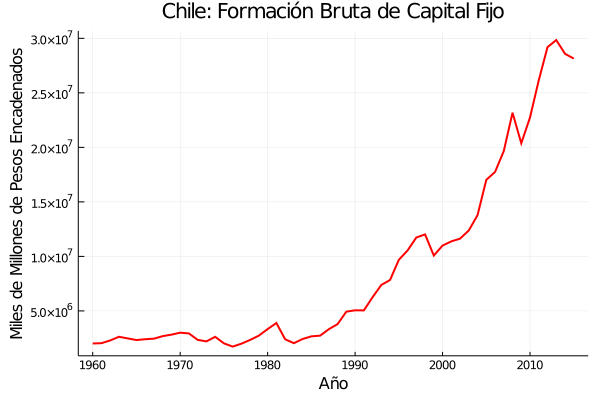

In [4]:
plt_inv = plot(tiempo,I, xlabel="Año", ylabel="Miles de Millones de Pesos Encadenados", 
               title = "Chile: Formación Bruta de Capital Fijo", 
               color="red", legend=false, linewidth = 2, grid = true)
display(plt_inv)

Usando los datos de inversión y la ecuación de acumulación capital, podemos construir la serie de stock de capital recursivamente:

$$K_{1961} = K_{1960} - \delta K_{1960} + I_{1960}$$
$$K_{1962} = K_{1961} - \delta K_{1961} + I_{1961}$$
$$\vdots$$
$$K_{2015} = K_{2014} - \delta K_{2014} + I_{2014}$$

Los ingredientes necesarios son el capital inicial y la tasa de depreciación. Algunas estimaciones indican que $K_{1960} = 30201645$ y usamos $\delta=0.05$ típicamente aplicada a datos anuales.

In [5]:
T = length(I)

56

Usamos un Loop for para construir la serie:

In [6]:
K = zeros(T,1)
K[1] = 30201645    # Capital Inicial
delta = 0.05

for i=2:T
    K[i] = K[i-1] - delta*K[i-1] + I[i-1]
end

Graficamos ahora los datos del stock de capital:

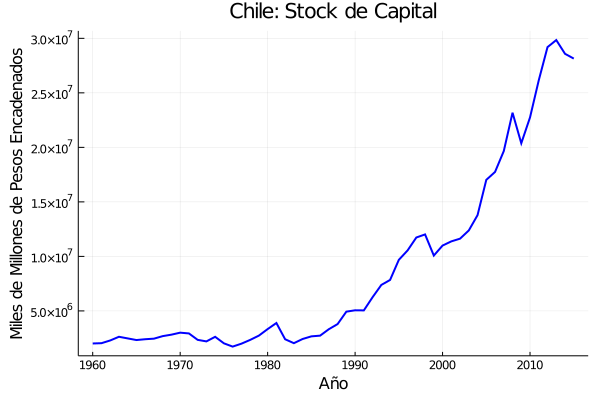

In [7]:
plt_cap = plot(tiempo,I, xlabel="Año", ylabel="Miles de Millones de Pesos Encadenados", 
               title = "Chile: Stock de Capital", 
               color="blue", legend=false, linewidth = 2, grid = true)
display(plt_cap)

### 8.2 Ciclos Económicos

*Aplicación tomada de Análisis Económico con Matlab de Gonzalo Fernández de Córdoba Martos.*

*Conjetura de Slutsky:* La economía es impedida de crecer sostenida y establemente a través de una senda de crecimiento lineal y sin fluctuaciones, debido a la actuación de factores exógenos o  shocks.

- Slutsky (1927) estableció las bases de una teoría del ciclo económico en *La sumatoria de causas aleatorias como fuente de procesos cíclicos.*
- Frisch (1933) expone ideas similares en *Problemas de propagación y problemas de impulsos en la economía.*

Supondremos que la economía está sujeta a shocks y que dichos shocks tienen asociados dos estados (llamémoslos, bueno y malo).

El componente cíclico de la producción de la economía puede ser modelado como un procesos persistente (autoregresivo) sujeto a los shocks mencionados:

$$y_t = \rho y_{t-1} + \epsilon_t$$

donde $\epsilon_t=1$ si el estado es bueno y $\epsilon_t=-1$ si el estado es malo. La probabilidad de que la economía se encuentre en un estado bueno es 0.5.

Suponemos que la economía inicialmente se encuentra en su tendencia.

Definimos los parámetros del modelo:

In [8]:
T    = 100
y    = zeros(T)
eps  = zeros(T)
phi  = 0.9
prob = 0.5
y[1] = 0;

Simulamos el comportamiento del ciclo usando un loop for y un condicional if:


In [9]:
for t=2:T
    if rand()<=prob 
        eps[t] = 1.0
    else
        eps[t] = -1.0
    end
    y[t] = phi*y[t-1]+eps[t]
end

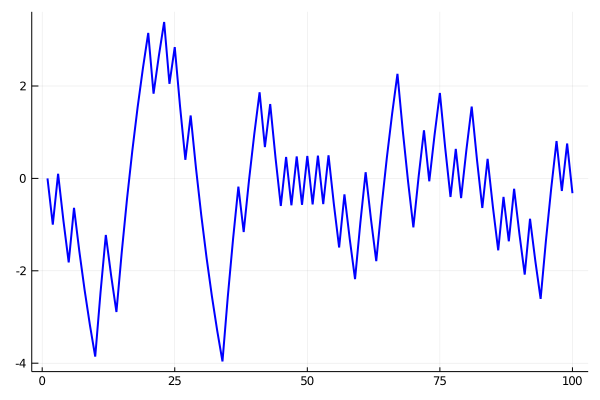

In [10]:
plot(collect(1:T), y, color="blue", legend=false, linewidth = 2, grid = true)

Note que la presencia de shocks aleatorio genera ciclos en la serie $y_t$. Si $\epsilon_t=0$ para todo $t$, entonces $y_t=0$ para todo $t$.

La serie no es suave debido a la naturaleza discreta de los estados y el número reducido de ellos.

Repitamos el ejercicio usando 4 estados: $\epsilon_t$ puede tomar los siguientes valores $(-1,-0.5,0.5,1)$ cada uno con probabilidad 0.25.

In [11]:
y   = zeros(T)
eps = zeros(T)

for t=2:T 
    a=rand();
    if a<=0.25
        eps[t] = 1.0
    elseif a<=0.5 
        eps[t] = 0.5
    elseif a<=0.75 
        eps[t] = -0.5
    else
        eps[t] = -1.0
    end
    y[t] = phi*y[t-1]+eps[t]
end

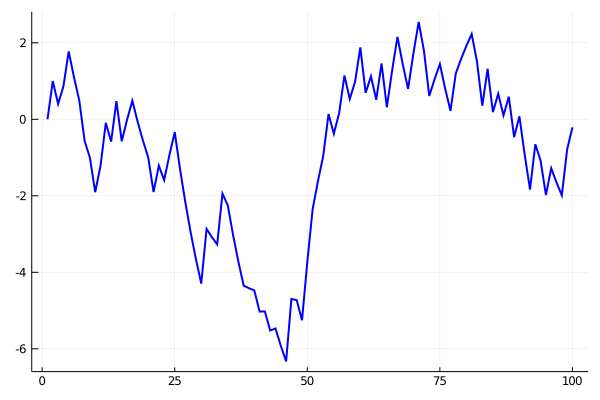

In [12]:
plot(collect(1:T), y, color="blue", legend=false, linewidth = 2, grid = true)

Suponiendo ahora que los shocks son una variable continua.

In [13]:
y   = zeros(T)
eps = zeros(T)

for t=2:T 
    eps[t]=0+2*randn()
    y[t] = phi*y[t-1]+eps[t]
end

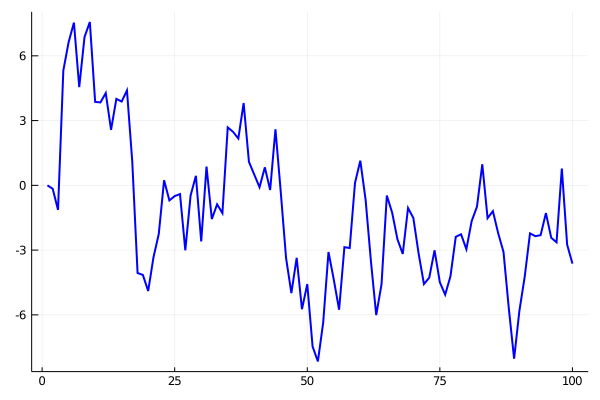

In [14]:
plot(collect(1:T), y, color="blue", legend=false, linewidth = 2, grid = true)

### 8.3 La Curva de Laffer

*Aplicación tomada de Análisis Económico con Matlab de Gonzalo Fernández de Córdoba Martos.*

En este ejercicio vamos a analizar el efecto de los impuestos en el equilibrio de mercado. 

Suponemos que el gobierno impone un impuesto $t$ por unidad de producto en el mercado del bien $A$. Las funciones de demanda y la oferta de mercado están dadas por:

$$p+t = a - b q^D$$
$$p = c + d q^S$$

con $p$ el precio, $q^D$ la cantidad demandada, $q^S$ la cantidad ofrecida y $a$, $b$, $c$ y $d$ parámetros.

Usando el equilibrio de mercado $q^D=q^S=q$ y algo de álgebra podemos calcular: 

$$q = \frac{a-(c+t)}{b+d}$$
$$p_c = \frac{ad+b(c+t)}{b+d}$$
$$p_v = \frac{d(a-t)+cb}{b+d}$$

La recaudación del gobierno será:

$$T = tq$$

Usando algo de geometría podemos calcular también los excedentes de los productores, de los consumidores y del gobierno, así como también de la pérdida irrecuperable de bienestar ocasionada por el impuesto.

$$EE = tq$$
$$EC = \frac{(a-p_c)q}{2}$$
$$EP = \frac{(p_v-c)q}{2}$$
$$PIE = \frac{t(q^{*}-q)}{2}$$ 

con $q^*=\frac{a-c}{b+d}$.

Escribamos una función que, dados los parámetros y el impuesto, calcule el equilibrio y los excedentes.

In [15]:
function equilibrio(param,t)

    # Calcula el equilibrio de mercado dados los parámetros del modelo
    a = param[1];
    b = param[2];
    c = param[3];
    d = param[4];

    # Equilibrio
    q  = (a-(c+t))/(b+d);
    pc = (a*d+b*(c+t))/(b+d);
    pv = (d*(a-t)+c*b)/(b+d);
    qstar = (a-c)/(b+d); 

    #Excedentes
    EE = t*q;
    EC = ((a-pc)*q)/2;
    EP = ((pv-c)*q)/2;
    PIE = (t*(qstar-q))/2; 
    ET = EC + EP + EE; 

    # Resultados
    return q, pc, pv, EE, EC,EP, PIE, ET 
end

equilibrio (generic function with 1 method)

Definamos los valores de los parámetros y probemos la función en un contexto sin impuestos:

In [16]:
a = 10.0
b = 0.1
c = 2.0
d = 0.5

p = [a, b, c, d]

res_si = equilibrio(p,0);

In [17]:
"La cantidad de equilibrio es $(res_si[1])" # Cantidad

"La cantidad de equilibrio es 13.333333333333334"

In [18]:
"El precio de equilibrio es $(res_si[2])" # Precio

"El precio de equilibrio es 8.666666666666668"

Ahora supongamos que $t=1$:

In [19]:
res_ci = equilibrio(p,1);

In [20]:
"El equilibrio con impuesto es: cantidad = $(res_ci[1]) y precio = $(res_ci[2])"

"El equilibrio con impuesto es: cantidad = 11.666666666666668 y precio = 8.833333333333334"

**La Curva de Laffer**

Recordemos que la Curva de Laffer muestra la relación entre la recaudación y el impuesto. Para encontrar dicha curva tenemos que resolver el equilibrio para varios niveles de $t$. Usamos un loop while.

In [21]:
inc = 0.1

t = 0
q = 1

Imp = Float64[]  # Inicializa un objeto vacío tipo Float64
Rec = Float64[]  # Inicializa un objeto vacío tipo Float64

while q>=0
    res = equilibrio(p,t)
    q   = res[1]
    Rec  = push!(Rec, res[4])
    Imp  = push!(Imp, t)
    t = t+inc
end

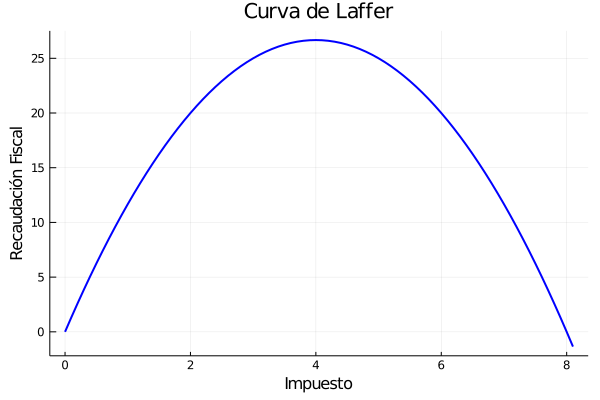

In [22]:
plt_laffer = plot(Imp,Rec, xlabel="Impuesto", ylabel="Recaudación Fiscal", 
               title = "Curva de Laffer",  color="blue", legend=false, linewidth = 2, grid = true)
display(plt_laffer)

*David Ricardo*:  Si la función de oferta se hace más y más inelástica entonces la tasa a partir de la cual los ingresos fiscales se hacen decrecientes tiende a infinito.

Repitamos el ejercicio anterior pero para dos curvas de oferta. Definamos nuevamente los parámetros:

In [23]:
a = 10
b = 0.1
c = [2, -10]
d = [0.5, 1.4]

inc = 0.1

np = length(d)
T  = 200

Imp = zeros(T,np)
Rec = zeros(T,np)
    
for j = 1:np
    p = [a, b, c[j], d[j]]
    
    t = 0.0

    for i=1:T
        res = equilibrio(p,t)
        q   = res[1]
        if q>=0
            Rec[i,j] = res[4]
            Imp[i,j] = t
        else
            Rec[i,j] = 0
            Imp[i,j] = t
        end
        t = t+inc
    end
end

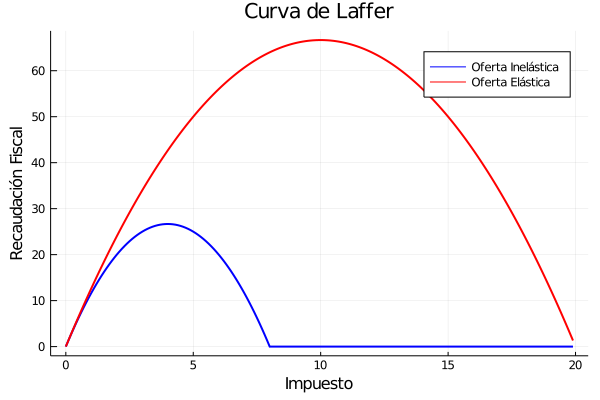

In [24]:
plot(Imp[:,1],Rec[:,1], label = "Oferta Inelástica", xlabel="Impuesto", ylabel="Recaudación Fiscal", 
               title = "Curva de Laffer",  color="blue", linewidth = 2, grid = true)
plot!(Imp[:,2],Rec[:,2], label = "Oferta Elástica", color="red", linewidth = 2)


Veamos como lucen las curvas de oferta:

In [25]:
of1(x) = c[1] + d[1]*x
of2(x) = c[2] + d[2]*x

x = collect(0:0.1:25)

po1 = of1.(x)
po2 = of2.(x);

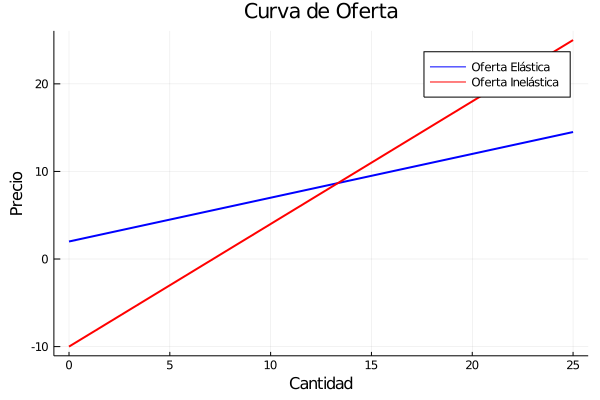

In [26]:
plot(x,[po1 po2], xlabel="Cantidad", ylabel="Precio", title = "Curva de Oferta", 
                  color=[:blue :red], label=["Oferta Elástica" "Oferta Inelástica"], legend = true, 
                  linewidth = 2, grid = true)

### 8.4 El Modelo de la Telaraña

*Aplicación tomada de Análisis Económico con Matlab de Gonzalo Fernández de Córdoba Martos.*

El modelo de la telaraña supone que en un mercado son necesarios algunos periodos de prueba y error para que los agentes económicos aprendan cuáles son los precios de equilibrio. Durante este periodo la cantidad ofrecida podría no ser igual a la cantidad demandada. 

Como antes, suponemos que las funciones de demanda y la oferta de mercado están dadas por:

$$p = a - b q^D$$
$$p = c + d q^S$$

Típicamente suponemos que $p$ se ajusta instantáneamente para que $q^D=q^S=q$.

Ahora suponemos que existe un proceso en el que tanto consumidores como productores modifican sus planes de consumo e inversión hasta que encuentran el equilibrio. 

El proceso de ajuste vendrá dado por una ley de movimiento que gobierna el mercado:

$$p_{t+1}-p_t = \alpha (q_t^D - q_t^S)$$

con $\alpha>0$.

- Si $q_t^D - q_t^S>0$, entonces $p_{t+1}-p_t>0$.
- Si $q_t^D - q_t^S<0$, entonces $p_{t+1}-p_t<0$.

El tamaño del ajuste depende del parámetro $\alpha$. Sustituyendo las cantidades en oferta y demanda en la ley de movimiento del mercado en el instante $t$ obtenemos:

$$p_{t+1}-p_t = \alpha \left(\frac{ad+cb}{db}\right) - \alpha \left(\frac{d+b}{db}\right) p_t $$

En equilibrio $p_{t+1}=p_t=p^*$ (estado estacionario), entonces: $$p^* = \frac{ad+cb}{b+d}$$. Usando este resultado:

$$p_{t+1}-p_t = \alpha \left(\frac{d+b}{db}\right) (p^*-p_t )$$

tenemos una ecuación en diferencias de primer orden.

 - Equilibrio estable con convergencia uniforme:

In [27]:
# Definicion de parametros
a = 10
b = 0.6
c = 2
d = 1.6

alpha = 0.08
T = 40
init = 0.5
pstar = (a*d + c*b)/(b+d)
println("Precio de Equilibrio: $pstar")
println("Ajuste: $(alpha*(d+b)/(d*b))")

p    = zeros(T);
p[1] = init*pstar;

for i = 2:T
    p[i] = p[i-1] + alpha*((d+b)/(d*b))*(pstar-p[i-1])
end

Precio de Equilibrio: 7.8181818181818175
Ajuste: 0.18333333333333335


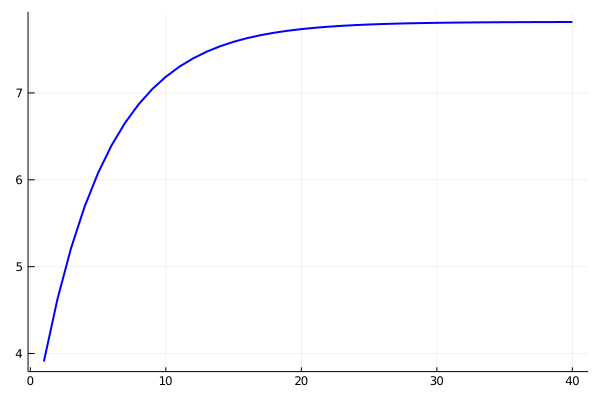

In [28]:
plot(collect(1:T),p, color=[:blue], legend = false, linewidth = 2, grid = true)

- Equilibrio estable con convergencia no uniforme:

In [29]:
alpha = 0.8

println("Precio de Equilibrio: $pstar")
println("Ajuste: $(alpha*(d+b)/(d*b))")

p    = zeros(T)
p[1] = init*pstar

for i = 2:T
    p[i] = p[i-1] + alpha*((d+b)/(d*b))*(pstar-p[i-1])
end

Precio de Equilibrio: 7.8181818181818175
Ajuste: 1.8333333333333337


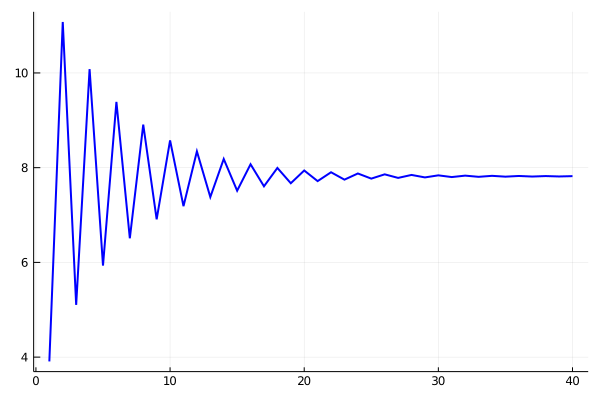

In [30]:
plot(collect(1:T),p, color=[:blue], legend = false, linewidth = 2, grid = true)

- Equilibrio explosivo:

In [31]:
alpha = 0.9

println("Precio de Equilibrio: $pstar")
println("Ajuste: $(alpha*(d+b)/(d*b))")

p    = zeros(T)
p[1] = init*pstar

for i = 2:T
    p[i] = p[i-1] + alpha*((d+b)/(d*b))*(pstar-p[i-1])
end

Precio de Equilibrio: 7.8181818181818175
Ajuste: 2.0625000000000004


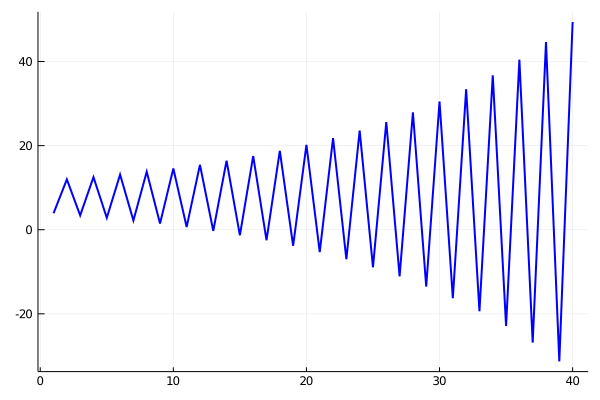

In [32]:
plot(collect(1:T),p, color=[:blue], legend = false, linewidth = 2, grid = true)